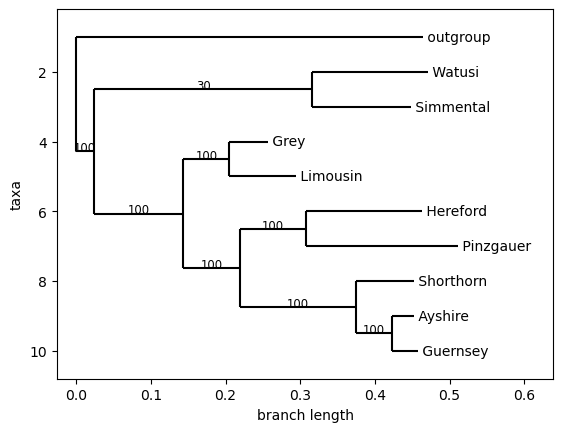

(outgroup:0.463885,((Watusi:0.155413,Simmental:0.133175)NODE_2:0.29148,((Grey:0.051806,Limousin:0.089283)NODE_4:0.06166,((Hereford:0.15528,Pinzgauer:0.202363)NODE_6:0.089046,(Shorthorn:0.076743,(Ayshire:0.030178,Guernsey:0.034415)NODE_8:0.047518)NODE_7:0.155886)NODE_5:0.075613)NODE_3:0.119416)NODE_1:0.024238);


In [2]:
# Purpose: convert a newick file into a directed acyclic graph

from Bio import Phylo
from io import StringIO
from ete3 import Tree

# Read the newick string from an input file
# This is an example of the input newick file
#'(outgroup:0.463885,((Watusi:0.155413,Simmental:0.133175)30:0.291480,((Grey:0.051806,Limousin:0.089283)100:0.061660,((Hereford:0.155280,Pinzgauer:0.202363)100:0.089046,(Shorthorn:0.076743,(Ayshire:0.030178,Guernsey:0.034415)100:0.047518)100:0.155886)100:0.075613)100:0.119416)100:0.024238);'
# It includes the taxa names, the branch length (decimal number), and the bootstrap support value. 
# Bootstraps are not relevant and will be stripped. 
# The outgroup will be removed and should not have any associated values in the final dataset.

with open('newick_10taxa_bs.txt', 'r') as file:
    newick_str = file.read()

# Read the tree using Bio.Phylo
treein = Phylo.read(StringIO(newick_str), "newick")

# Draw the tree using Phylo's default plotting mechanism
Phylo.draw(treein)

# Create a new Tree object using ete3 and provide the newick string
tree = Tree(newick_str)

# Label internal nodes with NODE_# to differentiate them
edge = 0
for node in tree.traverse():
    if not node.is_leaf():
        node.name = f"NODE_{edge}"
        edge += 1

# Get the modified tree as a newick string.
# Format 1 preserves branch lengths, otherwise use Format 8
labeled_node_tree = tree.write(format=1)

# Save the modified tree to a file (if needed)
# with open('modified_tree.txt', 'w') as file:
#     file.write(labeled_node_tree)

# Print the modified tree
print(labeled_node_tree)


In [3]:
from io import StringIO
from Bio import Phylo

def convert_newick_to_edge_list(newick_string):
    # Read the newick string and convert it into a tree object
    tree = Phylo.read(StringIO(newick_string), 'newick')

    # Create an empty list to store the extracted edge information
    edge_list = []

    # Traverse the tree and extract edge information
    # Iterate over each clade in the tree in level order
    for clade in tree.find_clades(order='level'):
        # Check if the clade has a name
        if clade.name is not None:
            # Iterate over each child clade of the current clade
            for child in clade.clades:
                # Check if the child clade has a branch length
                if child.branch_length is not None:
                    # Check if the child clade has a name
                    if child.name is not None:
                        # Append the edge information to the edge_list
                        edge_list.append((clade.name, child.name, child.branch_length))

    # Return the completed edge_list
    return edge_list



# Convert the labeled_node_tree string into an edge list using the convert_newick_to_edge_list function
edge_list = convert_newick_to_edge_list(labeled_node_tree)

# Print each edge in the edge_list
for edge in edge_list:
    print(edge)


('NODE_1', 'NODE_2', 0.29148)
('NODE_1', 'NODE_3', 0.119416)
('NODE_2', 'Watusi', 0.155413)
('NODE_2', 'Simmental', 0.133175)
('NODE_3', 'NODE_4', 0.06166)
('NODE_3', 'NODE_5', 0.075613)
('NODE_4', 'Grey', 0.051806)
('NODE_4', 'Limousin', 0.089283)
('NODE_5', 'NODE_6', 0.089046)
('NODE_5', 'NODE_7', 0.155886)
('NODE_6', 'Hereford', 0.15528)
('NODE_6', 'Pinzgauer', 0.202363)
('NODE_7', 'Shorthorn', 0.076743)
('NODE_7', 'NODE_8', 0.047518)
('NODE_8', 'Ayshire', 0.030178)
('NODE_8', 'Guernsey', 0.034415)


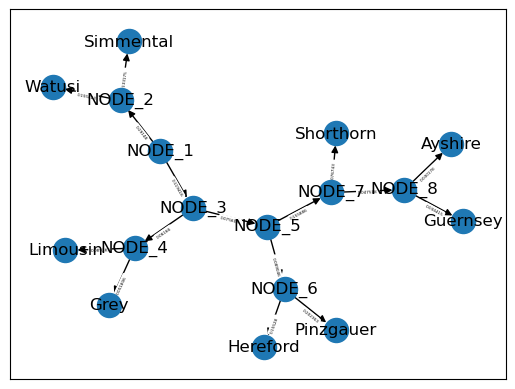

In [25]:
import networkx as nx

def visualize_digraph(digraph):
    layout = nx.nx_agraph.graphviz_layout(digraph, prog='neato')
    nx.draw_networkx_nodes(digraph, layout)
    nx.draw_networkx_labels(digraph, layout)
    nx.draw_networkx_edges(digraph, layout, edge_color='black', arrows=True)

    edge_labels = nx.get_edge_attributes(digraph, 'weight')
    edge_pos = nx.draw_networkx_edge_labels(
        digraph,
        layout,
        edge_labels=edge_labels,
        verticalalignment='center_baseline',
        label_pos=0.5,
        font_size=3
    )


# Create the directed graph
digraph = nx.DiGraph()
digraph.add_weighted_edges_from(edge_list)

# Save the digraph to a GraphML file
nx.write_graphml(digraph, 'digraph.graphml')

# Other formats just in case.

# Save the digraph to a GML file
#nx.write_gml(digraph, 'digraph.gml')

# Save the digraph to a GEXF file
#nx.write_gexf(digraph, 'digraph.gexf')

# Save the digraph to a pajek file
#nx.write_pajek(digraph, 'digraph.net')

# Visualize the digraph
visualize_digraph(digraph)